# Calculation of VAR using variance-covariance/parametric,Historical, Monte Carlo Simultion

## VAR using variance-covariance/parametric Methoed

### import required libraries

In [1]:
import numpy as np 
import pandas as pd 
import datetime as dt 
import yfinance as yf 
import matplotlib.pyplot as plt 
from scipy.stats import norm
import warnings
warnings.simplefilter('ignore')

/var/folders/2p/p3kd4d496db4lymthbvht84m0000gn/T/ipykernel_21725/3860960639.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Create dates, ticker variable and extrat adjusted close prices od stocks

In [2]:
years = 15
enddate = dt.datetime.now()
startdate = enddate - dt.timedelta(days = 365*years)

In [3]:
tickers = ['SPY','BND','GLD','QQQ','VTI']

In [4]:
adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start = startdate, end = enddate)
    adj_close_df[ticker] = data['Adj Close'] 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
adj_close_df

,SPY,BND,GLD,QQQ,VTI
Date,,,,,
2009-07-27,74.379860,50.567974,93.709999,34.383892,37.686424
2009-07-28,74.031967,50.620049,92.110001,34.147961,37.595230
2009-07-29,73.850449,50.600536,91.199997,34.375156,37.412880
2009-07-30,74.621826,50.828300,91.620003,34.576134,37.815594
2009-07-31,74.727730,51.049564,93.349998,34.471275,37.876369
...,...,...,...,...,...
2024-07-15,561.530029,72.750000,223.830002,496.149994,276.820007
2024-07-16,564.859985,73.029999,228.289993,496.339996,279.100006
2024-07-17,556.940002,73.099998,227.229996,481.769989,275.160004


### Calculate log return of adjusted price

In [6]:
log_return = np.log(adj_close_df/adj_close_df.shift(1))
log_return = log_return.dropna()


In [7]:
print(log_return)

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2009-07-28 -0.004688  0.001029 -0.017221 -0.006885 -0.002423
2009-07-29 -0.002455 -0.000386 -0.009929  0.006631 -0.004862
2009-07-30  0.010391  0.004491  0.004595  0.005830  0.010707
2009-07-31  0.001418  0.004344  0.018706 -0.003037  0.001606
2009-08-03  0.016362 -0.003202  0.005555  0.014845  0.016710
...              ...       ...       ...       ...       ...
2024-07-15  0.002746 -0.003157  0.003222  0.002684  0.004272
2024-07-16  0.005913  0.003841  0.019730  0.000383  0.008203
2024-07-17 -0.014120  0.000958 -0.004654 -0.029794 -0.014217
2024-07-18 -0.007715 -0.002602 -0.006402 -0.004744 -0.008760
2024-07-19 -0.006663 -0.002609 -0.018101 -0.008903 -0.006252

[3770 rows x 5 columns]


### create equally weighted portfolio

In [8]:
portfolio_value = 100000
weights = np.array([1/len(tickers)]*len(tickers))
print(weights)

[0.2 0.2 0.2 0.2 0.2]


### calculate historical portolio return

In [9]:
hist_port_return  = (log_return*weights).sum(axis=1)
print(hist_port_return)

Date
2009-07-28   -0.006038
2009-07-29   -0.002200
2009-07-30    0.007203
2009-07-31    0.004607
2009-08-03    0.010054
                ...   
2024-07-15    0.001954
2024-07-16    0.007614
2024-07-17   -0.012366
2024-07-18   -0.006045
2024-07-19   -0.008506
Length: 3770, dtype: float64


### Select time horizone

In [10]:
days = 5
hist_day_return = hist_port_return.rolling(window = days).sum()
hist_day_return = hist_day_return.dropna()

### create covariance matrix fow all securities, number of trading day in year

In [11]:
co_matrix = log_return.cov() * 252

In [12]:
co_matrix

,SPY,BND,GLD,QQQ,VTI
SPY,0.029366,-0.000020,0.001632,0.032391,0.029985
BND,-0.000020,0.002317,0.002213,0.000193,0.000026
GLD,0.001632,0.002213,0.024426,0.001847,0.001787
QQQ,0.032391,0.000193,0.001847,0.041490,0.033093
VTI,0.029985,0.000026,0.001787,0.033093,0.030866


### Calculate portfolio standard deviation, np.sqrt(variance of portfoio)

In [13]:
portfolio_std_dev = np.sqrt(weights.T @ co_matrix @ weights)

In [14]:
portfolio_std_dev

0.11571708971885122

### set different confidence levels to visualize


In [15]:
confidence_levels = [0.9,0.95,0.99]

### calculate var at different confidence levels

In [16]:
vars = []
for cl in confidence_levels:
    var = portfolio_value * portfolio_std_dev * norm.ppf(cl) * np.sqrt(days/252)
    vars.append(var)

In [17]:

print(f' {"Confidence Level":<20} {"Value at Risk":<20}')
print ('_' * 40)
# Print each confidence level and its corresponding VaR value
for cl, var in zip(confidence_levels, vars):
    print(f'{cl * 100:>6.0f}%: {"":<8} ${var:>10,.2f}')

 Confidence Level     Value at Risk       
________________________________________
    90%:          $  2,088.90
    95%:          $  2,681.08
    99%:          $  3,791.90


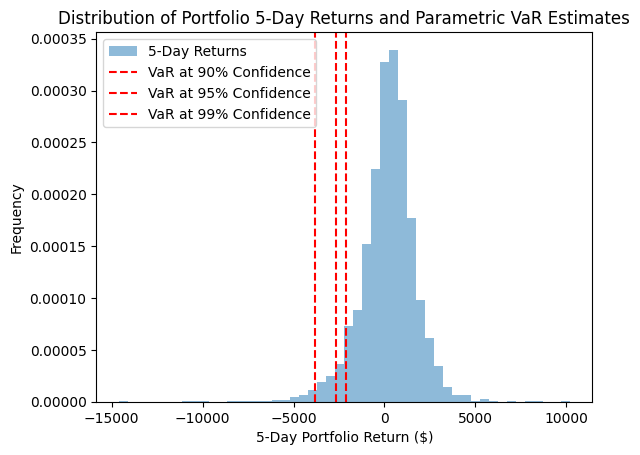

In [18]:
# Convert returns to dollar values for the histogram
historical_x_day_returns_dollar = hist_day_return * portfolio_value
# Plot the histogram
plt.hist(historical_x_day_returns_dollar, bins=50, density=True, alpha=0.5, label=f'{days}-Day Returns')
# Add vertical lines representing VaR at each confidence level
for cl, var in zip(confidence_levels, vars):
    plt.axvline(x=-var, linestyle='--', color='r', label='VaR at {}% Confidence'.format(int(cl * 100)))
plt.xlabel (f'{days}-Day Portfolio Return ($)')
plt.ylabel ('Frequency')
plt.title(f'Distribution of Portfolio {days}-Day Returns and Parametric VaR Estimates')
plt. legend ()
plt.show()

## Calculatio of VAR using Historical method

In [19]:
confidence_interval = 0.95
Historical_VaR = -np. percentile(historical_x_day_returns_dollar, 100 - (confidence_interval * 100))*portfolio_value
print(Historical_VaR)

237892983.04346162


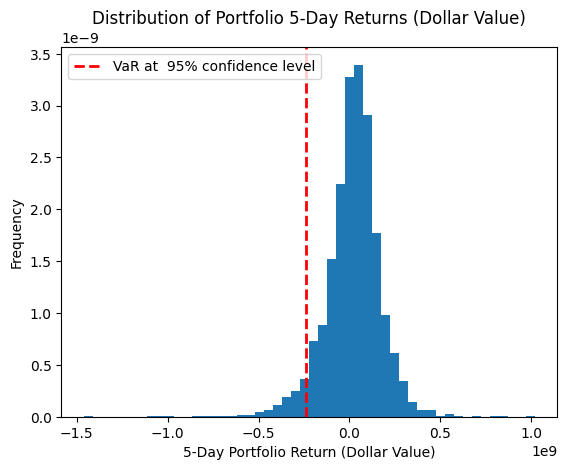

In [20]:

range_returns_dollar = historical_x_day_returns_dollar * portfolio_value
plt.hist(range_returns_dollar.dropna(), bins=50, density=True) 
plt. xlabel(f'{days}-Day Portfolio Return (Dollar Value)') 
plt.ylabel( 'Frequency')
plt.title(f'Distribution of Portfolio {days}-Day Returns (Dollar Value)')
plt.axvline(-Historical_VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval: .0%} confidence level') 
plt.legend()
plt.show()

### Calculating VAR using monte carlo simulation method

In [21]:
co_matrix_m = log_return.cov()

In [22]:
co_matrix_m

,SPY,BND,GLD,QQQ,VTI
SPY,1.165322e-04,-8.059490e-08,0.000006,1.285352e-04,1.189893e-04
BND,-8.059490e-08,9.192822e-06,0.000009,7.677235e-07,1.047350e-07
GLD,6.477216e-06,8.782649e-06,0.000097,7.328810e-06,7.091784e-06
QQQ,1.285352e-04,7.677235e-07,0.000007,1.646438e-04,1.313209e-04
VTI,1.189893e-04,1.047350e-07,0.000007,1.313209e-04,1.224852e-04


### calculating SD and Portfolio return

In [23]:
portfolio_std_dev_m = np.sqrt(weights.T @ co_matrix_m @ weights)
hist_port_return_m  = (log_return*weights).sum(axis=1)
print(hist_port_return_m)

Date
2009-07-28   -0.006038
2009-07-29   -0.002200
2009-07-30    0.007203
2009-07-31    0.004607
2009-08-03    0.010054
                ...   
2024-07-15    0.001954
2024-07-16    0.007614
2024-07-17   -0.012366
2024-07-18   -0.006045
2024-07-19   -0.008506
Length: 3770, dtype: float64


In [24]:
def random_z_score():
    return np.random.normal(0,1)

In [25]:
def scenario_gain_loss(portfolio_value,portfolio_std_dev_m,hist_port_return_m ,z_score, days):
    return portfolio_value * hist_port_return_m * days + portfolio_value * portfolio_std_dev_m * z_score * np.sqrt(days)
 # expected return over a period + adding volatile element gainf or return based on z value

In [26]:
# run 10000 simulation
simulations = 10000
scenarioo_result = []
for i in range(simulations):
    z_score = random_z_score()
    scenarioo_result.append(scenario_gain_loss(portfolio_value,portfolio_std_dev_m,hist_port_return_m ,z_score, days))
    

In [27]:
confidence_interval = 0.95
var_m = -np.percentile(scenarioo_result, 100*(1-confidence_interval))

In [28]:
var_m

6119.663748260152

In [ ]:
plt.hist(scenarioo_result, bins=50, density=True)
plt. xlabel( 'Scenario Gain/Loss ($)')
plt. ylabel ( 'Frequency')
plt.title(f'Distribution of Portfolio Gain/Loss Over {days} Days')
plt.axvline(-var_m, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt. legend()
plt.show()

## As the Confidence interval or time return_window/days increase, 
## this would lead to to shift of var to left side tail indicating higer value at risk for that time period.